# Gun Violence Data - Clustering
### K-means Clustering for Gun Violence Data (2014-2021)

#### This script contains following:
1. Import data and libraries
2. Elbow Technique 
3. K-mean clustering
4. Final result analysis

In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans 
import pylab as pl

In [2]:
#define path 
path=r'/Users/yeji/Documents/Career Foundry/Achievement 6'

In [3]:
#import data
df = pd.read_csv(os.path.join(path,'Data', 'Prepared Data', 'data_with_regions.csv'), index_col = 0)

In [4]:
#check head
df.head()

,incident_id,incident_date,month,day,year,state,city_or_county,address,killed,injured,Regions,year category
0,2201535,December 31 2021,December,31,2021,Maryland,Capitol Heights,Cindy Ln,0,4,South,early 2020s
1,2201716,December 31 2021,December,31,2021,Mississippi,Gulfport,1200 block of Lewis Ave,3,4,South,early 2020s
2,2201216,December 31 2021,December,31,2021,California,Los Angeles,10211 S. Avalon Blvd,0,6,West,early 2020s
3,2200968,December 30 2021,December,30,2021,Pennsylvania,Philadelphia,5100 block of Germantown Ave,0,6,Northeast,early 2020s
4,2201052,December 30 2021,December,30,2021,Missouri,Kirksville,700 block of E Dodson St,2,2,Midwest,early 2020s


In [5]:
#check shape
df.shape

(3389, 12)

In [6]:
#remove categorical data
df_int = df[['year','killed','injured']]

In [7]:
#remove extreme
df_new= df_int[df_int['injured']<50]

In [8]:
#check head of new dataframe
df_new.head()

,year,killed,injured
0,2021,0,4
1,2021,3,4
2,2021,0,6
3,2021,0,6
4,2021,2,2


### Elbow Technique

In [9]:
#define range of clusters and define kmeans
num_cl = range(1, 10) 
kmeans = [KMeans(n_clusters=i) for i in num_cl] 

In [10]:
#create score that represents rate of variation for cluster
score = [kmeans[i].fit(df_new).score(df_new) for i in range(len(kmeans))]
score

[-41712.50546206082,
 -27412.557534530955,
 -21242.567442798856,
 -15634.313168202561,
 -13535.328005265012,
 -11951.80605823347,
 -10420.219443794556,
 -9061.49264498826,
 -8396.12325574436]

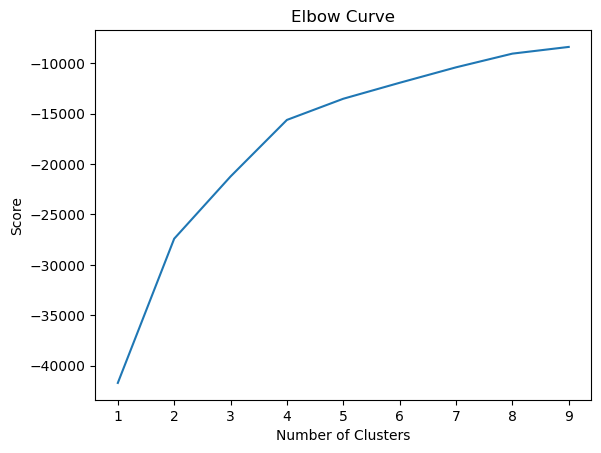

In [11]:
# Plot the elbow curve using PyLab

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

### Analysis
The curve jumps from 2 to 4 then starts to slightly increase after 4 so the optimal count of cluster is 4. 

### K-means clustering

In [12]:
# Create the k-means object
kmeans = KMeans(n_clusters = 4) 

In [13]:
# Fit the k-means object to the data
kmeans.fit(df_new)

KMeans(n_clusters=4)

In [14]:
#create column in dataframe with cluster assigned
df_new['clusters'] = kmeans.fit_predict(df_new)

/var/folders/7c/wd1dsfj543j4h3klbp_x650w0000gn/T/ipykernel_77104/1569880713.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['clusters'] = kmeans.fit_predict(df_new)


In [15]:
#check head
df_new.head()

,year,killed,injured,clusters
0,2021,0,4,1
1,2021,3,4,1
2,2021,0,6,1
3,2021,0,6,1
4,2021,2,2,1


In [16]:
#check number in each cluster
df_new['clusters'].value_counts()

1    1795
0    1112
3     418
2      62
Name: clusters, dtype: int64

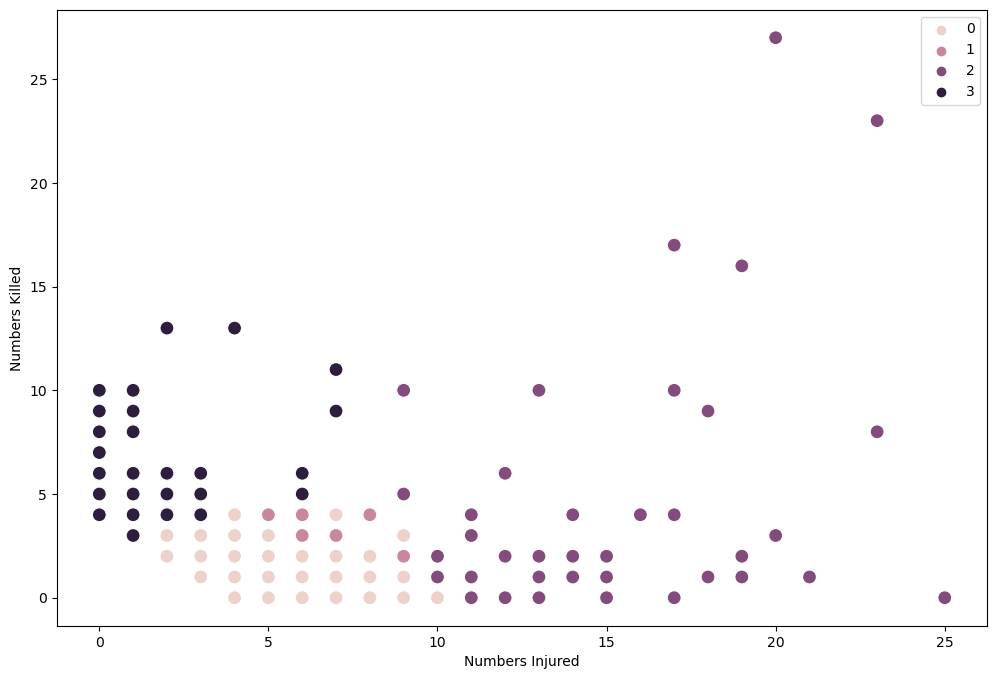

In [17]:
# Plot the clusters for the "injured" and "killed" variables

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_new['injured'], y=df_new['killed'], hue=kmeans.labels_, s=100) 
ax.grid(False)
plt.xlabel('Numbers Injured') 
plt.ylabel('Numbers Killed')
plt.show()

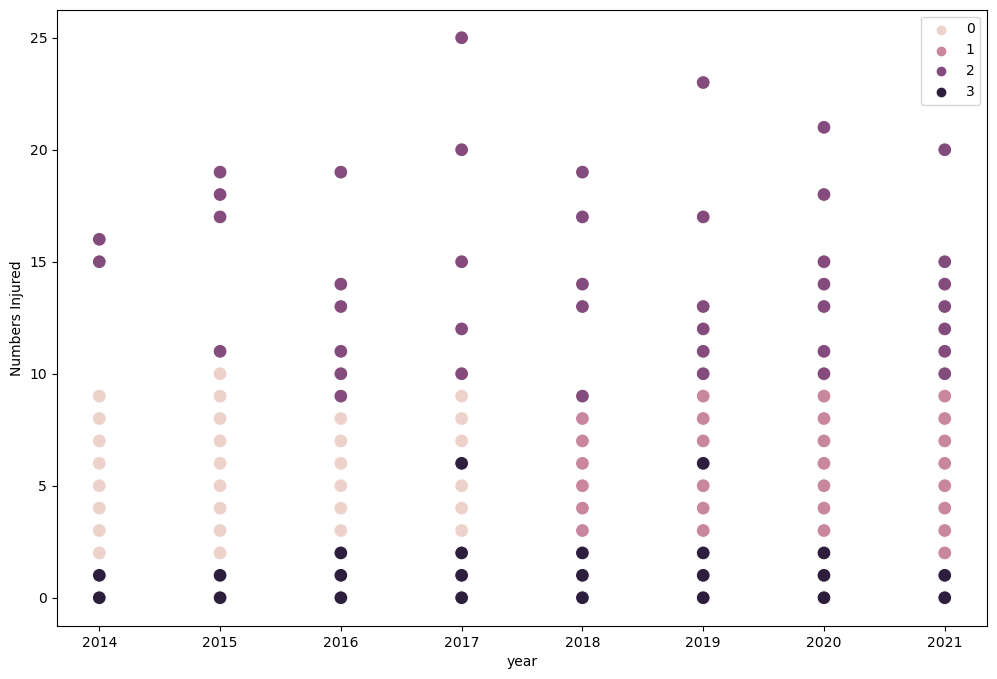

In [18]:
# Plot the clusters for the "year" and "injured" variables

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_new['year'], y=df_new['injured'], hue=kmeans.labels_, s=100) 
ax.grid(False)
plt.xlabel('year') 
plt.ylabel('Numbers Injured')
plt.show()

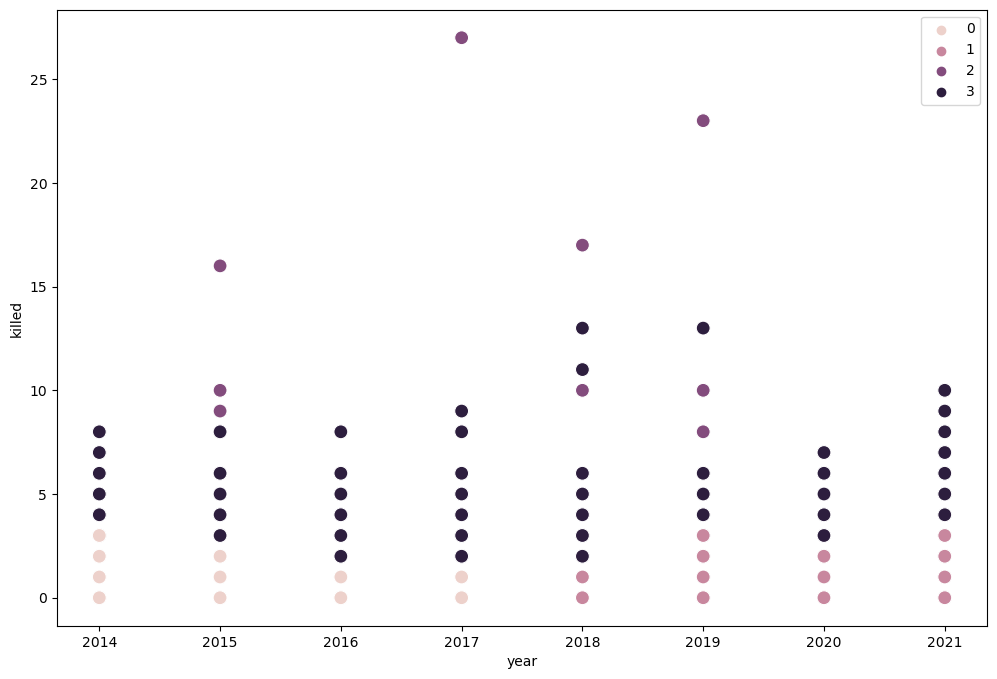

In [19]:
# Plot the clusters for the "year" and "killed" variables

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_new['year'], y=df_new['killed'], hue=kmeans.labels_, s=100) 
ax.grid(False)
plt.xlabel('year') 
plt.ylabel('killed')
plt.show()

### Analysis
The first scatterplot with injured and killed shows cluster 3 condensed towards the left of the chart and cluster 0 and 1 in the mid-front of the plot and cluster 2 towards the middle and left side of the chart. Therefore, the clusters could have been created depending on the number of injured and killed combined. 
The second and third scatterplot with year&injured and year&killed shows clusters 0 between years 2014-2017 and cluster 1 between years 2018 and 2021. Cluster 2 is mostly seen in the chart with injured and cluster 3 for chart with killed

In [20]:
#adding names for cluster group 
df_new.loc[df_new['clusters'] == 0, 'cluster'] = 'pink'
df_new.loc[df_new['clusters'] == 1, 'cluster'] = 'purple'
df_new.loc[df_new['clusters'] == 2, 'cluster'] = 'dark purple'
df_new.loc[df_new['clusters'] == 3, 'cluster'] = 'black'

/var/folders/7c/wd1dsfj543j4h3klbp_x650w0000gn/T/ipykernel_77104/343040536.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new.loc[df_new['clusters'] == 0, 'cluster'] = 'pink'


In [21]:
#descriptive statistics
df_new.groupby('cluster').agg({'year':['mean', 'median'], 
                         'injured':['mean', 'median'], 
                         'killed':['mean', 'median']})

year            injured           killed       
                    mean  median       mean median      mean median
cluster                                                            
black        2017.633971  2018.0   1.258373    1.0  3.703349    3.0
dark purple  2018.354839  2019.0  13.822581   13.0  3.322581    1.0
pink         2015.557554  2016.0   4.243705    4.0  0.545863    0.0
purple       2019.873538  2020.0   4.222284    4.0  0.613370    0.0

### Final Analysis
The descriptive analysis shows:
- dark purple cluster has highest median for injured around year 2019, which shows that around that year, more gun violence incidents occured.
- black clusters have highest number of killed cases but lowest injured cases
- pink and purple clusters have similar number of injured and killed
- There should be an assessment of what occured around year 2019 that increased the number of injured cases
